In [ ]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 874.1/874.1 kB 12.2 MB/s eta 0:00:00


In [ ]:
!yolo task=detect mode=predict model=/content/drive/MyDrive/project/best.pt source=/content/drive/MyDrive/project/steel_data/images/images/welding_line/img_01_425391600_00018.jpg


In [31]:
from ultralytics import YOLO
model = YOLO('/content/drive/MyDrive/Colab Notebooks/ai프로젝트/model/yolo_js.pt')
results = model.predict(source='/content/drive/MyDrive/Colab Notebooks/ai프로젝트/test3.jpg')
import matplotlib.pyplot as plt
import cv2
# 예측 결과 중 첫 번째 이미지를 가져와 시각화
annotated_img = results[0].plot()  # 이미지에 탐지된 객체를 그리기
# OpenCV 이미지를 Matplotlib으로 시각화하기 위해 RGB로 변환
annotated_img_rgb = cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB)
# 이미지 출력
plt.imshow(annotated_img_rgb)
plt.axis('off')  # 축 없애기
plt.show()

FileNotFoundError: No images or videos found in /content/drive/MyDrive/Colab Notebooks/ai프로젝트/test2.heic. Supported formats are:
images: {'tiff', 'pfm', 'jpg', 'bmp', 'tif', 'jpeg', 'png', 'webp', 'mpo', 'dng'}
videos: {'avi', 'mov', 'mpg', 'm4v', 'asf', 'wmv', 'ts', 'mp4', 'mpeg', 'webm', 'gif', 'mkv'}


image 1/1 /content/drive/MyDrive/Colab Notebooks/ai프로젝트/test3.jpg: 640x640 1 10_yaozhed, 1 4_shuiban, 219.9ms
Speed: 3.2ms preprocess, 219.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)
ultralytics.engine.results.Boxes object with attributes:

cls: tensor([1., 5.])
conf: tensor([0.1844, 0.1033])
data: tensor([[3.8995e+01, 3.8690e+02, 6.2232e+02, 6.4000e+02, 1.8442e-01, 1.0000e+00],
        [4.5467e+02, 1.8839e+00, 6.4000e+02, 3.9299e+02, 1.0326e-01, 5.0000e+00]])
id: None
is_track: False
orig_shape: (640, 640)
shape: torch.Size([2, 6])
xywh: tensor([[330.6581, 513.4482, 583.3262, 253.1036],
        [547.3368, 197.4374, 185.3264, 391.1071]])
xywhn: tensor([[0.5167, 0.8023, 0.9114, 0.3955],
        [0.8552, 0.3085, 0.2896, 0.6111]])
xyxy: tensor([[ 38.9950, 386.8964, 622.3212, 640.0000],
        [454.6736,   1.8839, 640.0000, 392.9909]])
xyxyn: tensor([[0.0609, 0.6045, 0.9724, 1.0000],
        [0.7104, 0.0029, 1.0000, 0.6140]])
tensor([ 38.9950, 386.8964, 622.

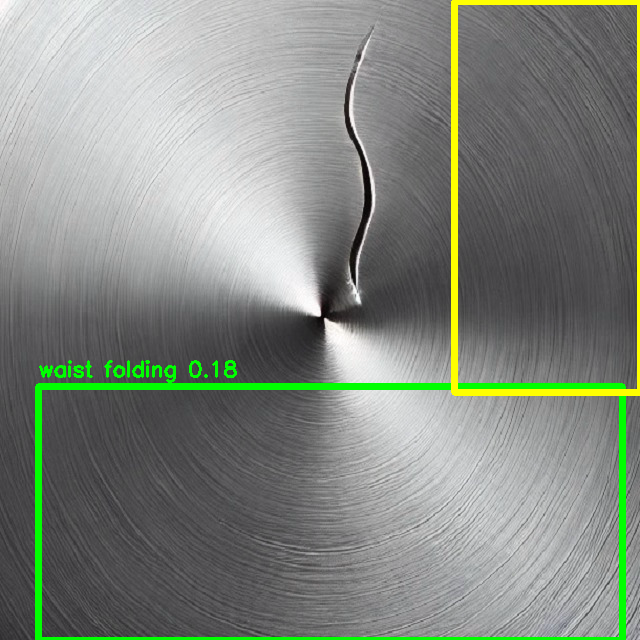

In [34]:
from ultralytics import YOLO
model = YOLO('/content/drive/MyDrive/Colab Notebooks/ai프로젝트/model/yolo_js.pt')
results = model.predict(
    '/content/drive/MyDrive/Colab Notebooks/ai프로젝트/test3.jpg',
    save=False,
    imgsz=640,
    conf=0.1,
    device="cpu",
)
for r in results:
    print(r.boxes)
for r in results:
    boxes = r.boxes.xyxy
    for box in boxes:
        print(box)
print(r.names)
r.names={0: 'yaozhe', 1:'waist folding', 2:'punching hole', 3:'welding line', 4:'crescent gap', 5:'water spot', 6:'oil spot', 7:'silk spot', 8:'inclusion', 9:'rolled pit', 10:'crease', 11:'d'}
print(r.names)
for r in results:
    image_path = r.path # 현재 이미지의 path
    boxes = r.boxes.xyxy # 현재 이미지의 bbox의 xy좌표값들
    cls = r.boxes.cls # 현재 이미지의 bbox의 class들
    conf = r.boxes.conf # 현재 이미지의 bbox의 conf값
    cls_dict = r.names # 지금 예제는 {0: 'joint', 1: 'side'}
    # boxes, cls, conf 개수는 같기 때문에 zip으로 한번 묶어준다
    for box, cls_number, conf in zip(boxes, cls, conf):
        conf_number = float(conf.item())
        cls_number_int = int(cls_number.item())
        cls_name = cls_dict[cls_number_int]
        x1, y1, x2, y2 = box
        x1_int = int(x1.item())
        y1_int = int(y1.item())
        x2_int = int(x2.item())
        y2_int = int(y2.item())
        print(x1_int, y1_int, x2_int, y2_int, cls_name)
# bfrom google.colab.patches import cv2_imshow
from google.colab.patches import cv2_imshow
import random
# 클래스별 색상 설정 (랜덤 색상으로)
# 클래스별 색상 사전 정의
color_dict = {
    0: (255, 0, 0),   # yaozhe - 빨강
    1: (0, 255, 0),   # waist folding - 초록
    2: (0, 0, 255),   # punching hole - 파랑
    3: (255, 255, 0), # welding line - 노랑
    4: (255, 0, 255), # crescent_gap - 핑크
    5: (0, 255, 255), # water spot - 청록
    6: (128, 0, 128), # oil spot - 보라
    7: (128, 128, 0), # silk spot - 올리브
    8: (0, 128, 128), # inclusion - 청록
    9: (128, 128, 128),# rolled pit - 회색
    10: (0, 0, 0),    # crease - 검정
    11: (192, 192, 192) # d - 은색
}
for r in results:
    image_path = r.path # 현재 이미지의 path
    boxes = r.boxes.xyxy # 현재 이미지의 bbox의 xy좌표값들
    cls = r.boxes.cls # 현재 이미지의 bbox의 class들
    conf = r.boxes.conf # 현재 이미지의 bbox의 conf값
    cls_dict = r.names # 지금 예제는 {0: 'joint', 1: 'side'}
    import cv2
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    h, w, c = image.shape
    image = cv2.resize(image, (640, 640)) # 출력할 이미지 사이즈 조정
    for box, cls_number, conf in zip(boxes, cls, conf):
        conf_number = float(conf.item())
        cls_number_int = int(cls_number.item())
        cls_name = cls_dict[cls_number_int]
        x1, y1, x2, y2 = box
        x1_int = int(x1.item())
        y1_int = int(y1.item())
        x2_int = int(x2.item())
        y2_int = int(y2.item())
        print(x1_int, y1_int, x2_int, y2_int, cls_name)
        # 사각형과 텍스트 색상 설정
        box_color = color_dict[cls_number_int]
        text_color = color_dict[cls_number_int]
        # 이미지에 라벨(클래스 이름) 추가
        label = f"{cls_name} {conf_number:.2f}"  # 클래스 이름과 신뢰도
        # 출력할 이미지 사이즈를 조정했기 때문에 좌표값도 같이 조정 한다
        scale_factor_x = 640 / w
        scale_factor_y = 640 / h
        x1_scale = int(x1_int * scale_factor_x)
        y1_scale = int(y1_int * scale_factor_y)
        x2_scale = int(x2_int * scale_factor_x)
        y2_scale = int(y2_int * scale_factor_y)
        image = cv2.rectangle(
            image, (x1_scale, y1_scale), (x2_scale, y2_scale), box_color, 6
        )
        # 텍스트 추가 (x1_scale, y1_scale 위에 표시)
        image = cv2.putText(
            image, label, (x1_scale, y1_scale - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, text_color, 2
        )
    # cv2.imwrite("./test.jpg", image) # 이미지 저장
    cv2_imshow(image)
    cv2.waitKey(0)